In [34]:
pip install tensorflow==2.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
!apt-get -qq install  -y libsm6 libxext6 && pip install -q -U opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 5.4 MB/s eta 0:00:00


In [41]:
!apt install libnvrtc8.0
!pip install mxnet-cu8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mxnet-cu8 (from versions: none)
ERROR: No matching distribution found for mxnet-cu8


In [35]:
import numpy as np 
import pandas as pd

In [44]:
from tensorflow import keras 
from tensorflow.keras import layers

In [46]:
import time
import pandas_datareader as pdr

import keras
from keras.layers import LSTM
from keras.models import Sequential

from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/AMAN1011011/Stock_Forecasting_project/main/DATA.api/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
1,2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
2,2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7861100
3,2022-01-18,520.080017,521.750000,508.679993,510.799988,510.799988,4839100
4,2022-01-19,515.000000,523.210022,510.510010,515.859985,515.859985,4353500


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [50]:
df["Date"] = pd.to_datetime(df["Date"])


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [52]:
df["Date"].min(), df["Date"].max()


(Timestamp('2022-01-12 00:00:00'), Timestamp('2023-01-11 00:00:00'))

In [53]:
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7861100
2022-01-18,520.080017,521.750000,508.679993,510.799988,510.799988,4839100
2022-01-19,515.000000,523.210022,510.510010,515.859985,515.859985,4353500


Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

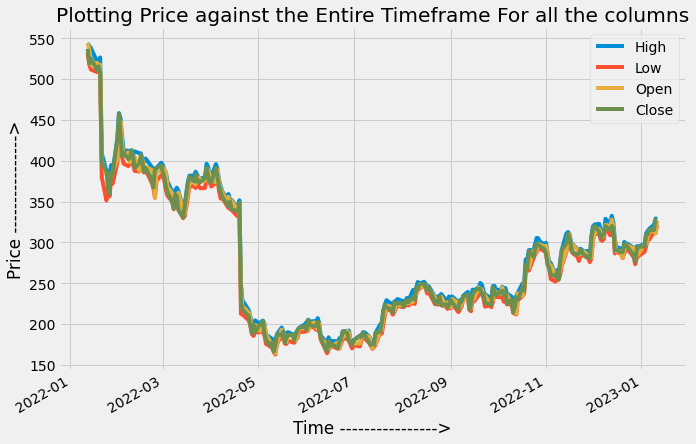

In [54]:
df[["High", "Low", "Open", "Close"]].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For HIGH column')

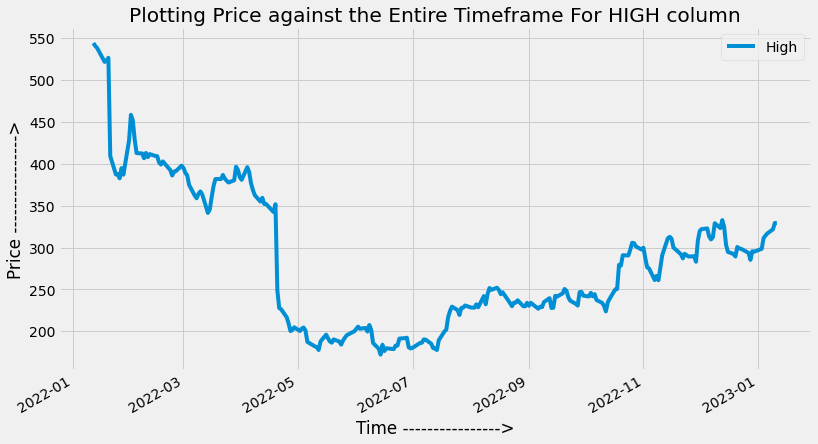

In [55]:
plt.figure(figsize=(12,7))
df["High"].plot()
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For HIGH column")

In [56]:
new_df = pd.DataFrame(df["High"].copy(), columns=["High"])
new_df.head()

,High
Date,
2022-01-12,544.270020
2022-01-13,540.789978
2022-01-14,538.369995
2022-01-18,521.750000
2022-01-19,523.210022


In [57]:
train_size = int(len(new_df)*0.8)

train = new_df.iloc[0:train_size]
test = new_df.iloc[train_size:len(new_df)]

In [58]:
len(train), len(test)

(200, 51)

In [59]:
def create_dataset(X, y, lag=1):
    xs,ys = [], []
    
    for i in range(len(X) - lag):
        tmp = X.iloc[i: i+lag].values
        xs.append(tmp)
        ys.append(y.iloc[i+lag])
    
    return np.array(xs), np.array(ys)

In [60]:
xtrain, ytrain = create_dataset(train, train["High"],10)
xtest, ytest = create_dataset(test, test["High"],10)

In [61]:
xtrain[0]

array([[544.27002 ],
       [540.789978],
       [538.369995],
       [521.75    ],
       [523.210022],
       [526.640015],
       [409.149994],
       [387.26001 ],
       [387.709991],
       [382.660004]])

In [62]:
ytrain[0]

394.799988

In [63]:
xtrain.shape

(190, 10, 1)

In [64]:
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(xtrain.shape[1], xtrain.shape[2])))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [65]:
model.fit(xtrain, ytrain,
         epochs=10,
         batch_size=10,
         verbose=1,
         shuffle=False
         )

Epoch 1/10
19/19 [==============================] - 3s 11ms/step - loss: 36147.1562
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 7284.2139
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 1865.8920
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 401.1210
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 275.8786
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 241.6863
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 381.0301
Epoch 8/10
19/19 [==============================] - 0s 10ms/step - loss: 318.7571
Epoch 9/10
19/19 [==============================] - 0s 10ms/step - loss: 275.2510
Epoch 10/10
19/19 [==============================] - 0s 10ms/step - loss: 205.0202


In [66]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Entire Timeframe')

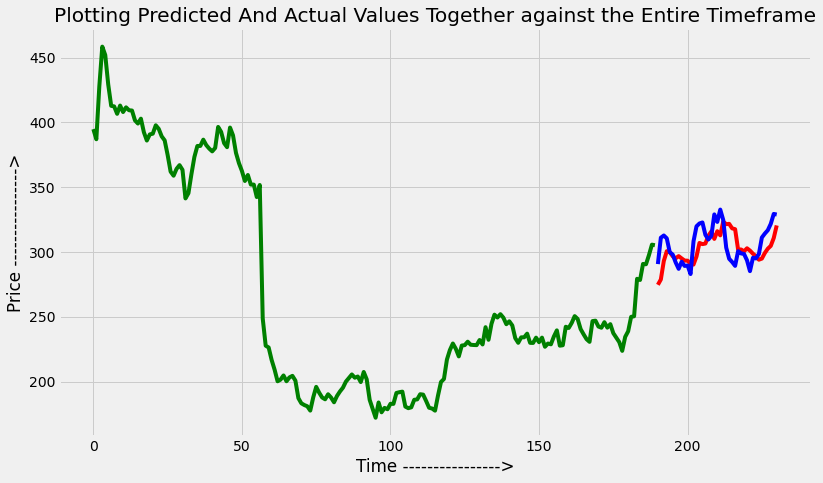

In [67]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(0, len(xtrain)), ytrain, 'g', label="history")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ypred, 'r', label="predictions")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ytest, 'b', label="Actual")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Entire Timeframe")

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred,squared=False)

14.435004994902348

Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Testing Timeframe')

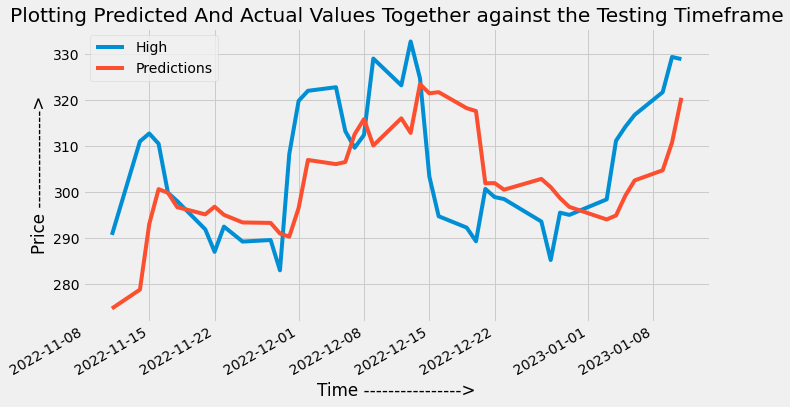

In [69]:
test = new_df.iloc[train_size+10:].copy()

test["Predictions"] = ypred
test[["High", "Predictions"]].plot()
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Testing Timeframe")

In [74]:
model = Sequential()
model.add(LSTM(100, activation='relu',
           input_shape=(10,1), 
           return_sequences=True))
model.add(Dropout(0.2))

# hidden layer 2
model.add(LSTM(100,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [75]:
model.fit(xtrain, ytrain, 
               epochs=20, batch_size=16,
               verbose=1,
               #validation_split=0.05,
               )

Epoch 1/20
12/12 [==============================] - 6s 20ms/step - loss: 21567.1387
Epoch 2/20
12/12 [==============================] - 0s 18ms/step - loss: 9688.3857
Epoch 3/20
12/12 [==============================] - 0s 19ms/step - loss: 6207.7949
Epoch 4/20
12/12 [==============================] - 0s 16ms/step - loss: 7280.3223
Epoch 5/20
12/12 [==============================] - 0s 17ms/step - loss: 6600.2090
Epoch 6/20
12/12 [==============================] - 0s 17ms/step - loss: 6404.6426
Epoch 7/20
12/12 [==============================] - 0s 17ms/step - loss: 3914.1780
Epoch 8/20
12/12 [==============================] - 0s 16ms/step - loss: 3310.9207
Epoch 9/20
12/12 [==============================] - 0s 16ms/step - loss: 3876.9226
Epoch 10/20
12/12 [==============================] - 0s 16ms/step - loss: 3591.2100
Epoch 11/20
12/12 [==============================] - 0s 18ms/step - loss: 5097.6851
Epoch 12/20
12/12 [==============================] - 0s 16ms/step - loss: 4665.7256


In [76]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 15ms/step


Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together')

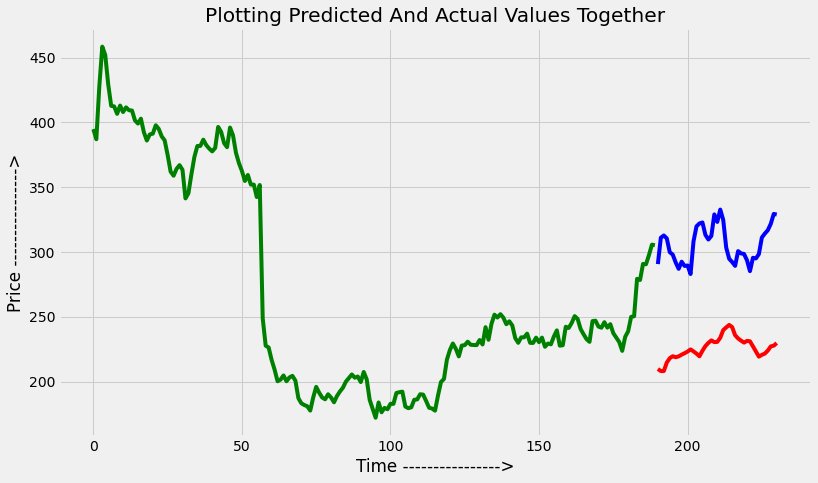

In [77]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(0, len(xtrain)), ytrain, 'g', label="history")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ypred, 'r', label="predictions")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ytest, 'b', label="Actual")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together")

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred,squared=False)

81.62830937787166

Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Testing Timeframe')

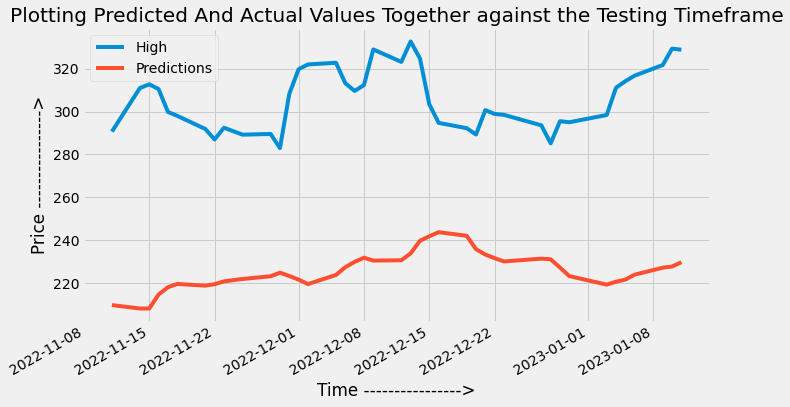

In [79]:
test = new_df.iloc[train_size+10:].copy()

test["Predictions"] = ypred
test[["High", "Predictions"]].plot()
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Testing Timeframe")

# the above ML model is providing an accuracy of 81.6 percentage 
# using Linear regression, Logistic Regression and Random forest
# the above mentioned accuracy persentage is the mean of all these three 